     sepal_length  sepal_width  petal_length  petal_width     species
74            6.4          2.9           4.3          1.3  versicolor
119           6.0          2.2           5.0          1.5   virginica
51            6.4          3.2           4.5          1.5  versicolor
66            5.6          3.0           4.5          1.5  versicolor
22            4.6          3.6           1.0          0.2      setosa
Epoch 0 : 14 / 45 - 31.11 % acc
Epoch 1 : 14 / 45 - 31.11 % acc
Epoch 2 : 14 / 45 - 31.11 % acc
Epoch 3 : 14 / 45 - 31.11 % acc
Epoch 4 : 18 / 45 - 40.00 % acc
Epoch 5 : 39 / 45 - 86.67 % acc
Epoch 6 : 39 / 45 - 86.67 % acc
Epoch 7 : 40 / 45 - 88.89 % acc
Epoch 8 : 40 / 45 - 88.89 % acc
Epoch 9 : 43 / 45 - 95.56 % acc
Epoch 10 : 37 / 45 - 82.22 % acc
Epoch 11 : 41 / 45 - 91.11 % acc
Epoch 12 : 43 / 45 - 95.56 % acc
Epoch 13 : 43 / 45 - 95.56 % acc
Epoch 14 : 43 / 45 - 95.56 % acc
Epoch 15 : 38 / 45 - 84.44 % acc
Epoch 16 : 41 / 45 - 91.11 % acc
Epoch 17 : 42 / 45 - 93.33 % 

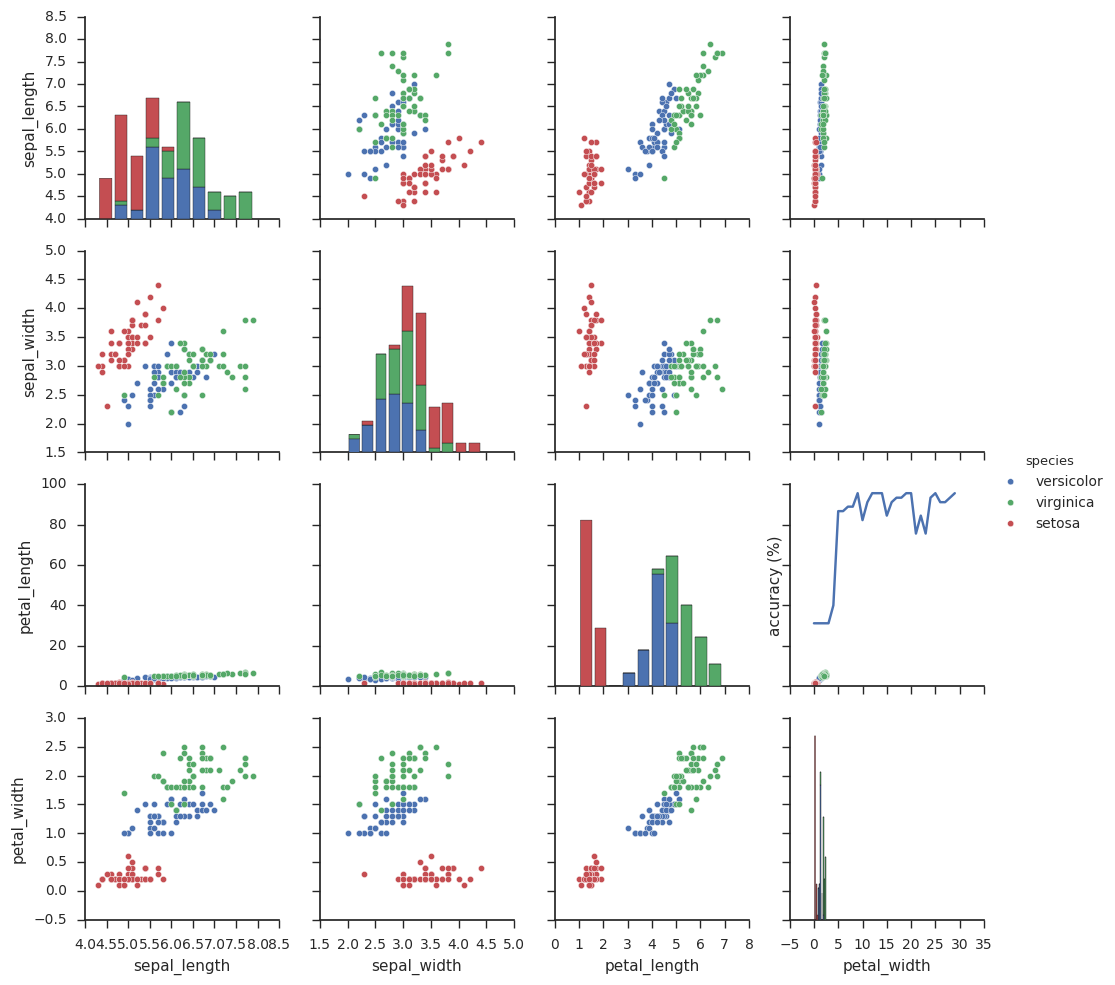

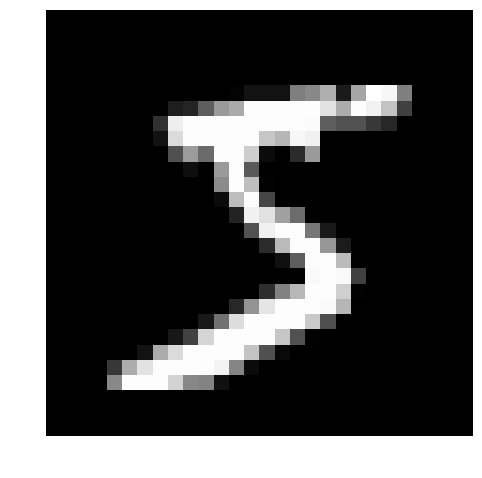

Epoch 0 : 9018 / 10000 - 90.18 % acc
Epoch 1 : 9181 / 10000 - 91.81 % acc
Epoch 2 : 9285 / 10000 - 92.85 % acc
Epoch 3 : 9310 / 10000 - 93.10 % acc
Epoch 4 : 9391 / 10000 - 93.91 % acc
Epoch 5 : 9418 / 10000 - 94.18 % acc
Epoch 6 : 9393 / 10000 - 93.93 % acc
Epoch 7 : 9393 / 10000 - 93.93 % acc
Epoch 8 : 9419 / 10000 - 94.19 % acc
Epoch 9 : 9373 / 10000 - 93.73 % acc
Epoch 10 : 9431 / 10000 - 94.31 % acc
Epoch 11 : 9461 / 10000 - 94.61 % acc
Epoch 12 : 9439 / 10000 - 94.39 % acc
Epoch 13 : 9436 / 10000 - 94.36 % acc
Epoch 14 : 9416 / 10000 - 94.16 % acc
Epoch 15 : 9464 / 10000 - 94.64 % acc
Epoch 16 : 9460 / 10000 - 94.60 % acc
Epoch 17 : 9474 / 10000 - 94.74 % acc
Epoch 18 : 9460 / 10000 - 94.60 % acc
Epoch 19 : 9490 / 10000 - 94.90 % acc
Epoch 20 : 9485 / 10000 - 94.85 % acc
Epoch 21 : 9462 / 10000 - 94.62 % acc
Epoch 22 : 9467 / 10000 - 94.67 % acc
Epoch 23 : 9492 / 10000 - 94.92 % acc
Epoch 24 : 9473 / 10000 - 94.73 % acc
Epoch 25 : 9475 / 10000 - 94.75 % acc
Epoch 26 : 9483 / 1000

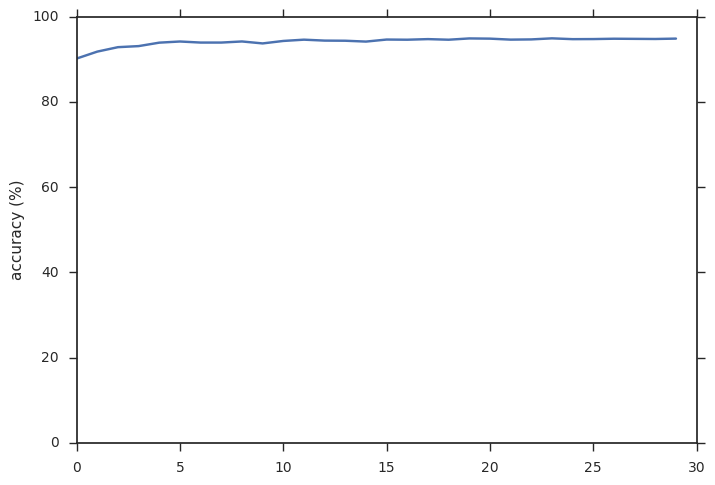

In [10]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import shuffle





class Network(object):
    
    def __init__(self, sizes):
        
        """The list ``sizes`` contains the number of neurons in the
        respective layers of the network.  For example, if the list
        was [2, 3, 1] then it would be a three-layer network, with the
        first layer containing 2 neurons, the second layer 3 neurons,
        and the third layer 1 neuron.  The biases and weights for the
        network are initialized randomly, using a Gaussian
        distribution with mean 0, and variance 1.  Note that the first
        layer is assumed to be an input layer, and by convention we
        won't set any biases for those neurons, since biases are only
        ever used in computing the outputs for later layers."""
        
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x) for x, y in zip(sizes[:-1], sizes[1:])]
        
    def feedforward (self, a):
        
        """Return the output of the network if "a" is input. The np.dot() 
        function computes the matrix multiplication between the weight and input
        matrices for each set of layers. When used with numpy arrays, the '+'
        operator performs matrix addition."""
        
        for b, w in zip(self.biases, self.weights):
            a = sigmoid(np.dot(w, a)+b)
        return a
    
    
    
    def SGD(self, training_data, epochs, mini_batch_size, eta, test_data=None):

        results = []

        n = len(training_data)
        
        if test_data: 
            n_test = len(test_data)
            
        for j in xrange(epochs):
            
            # before each epoch, the data is randomly shuffled
            random.shuffle(training_data)
            
            # training data is broken up into individual mini-batches
            mini_batches = [ training_data[k:k+mini_batch_size] 
                            for k in xrange(0, n, mini_batch_size) ]
            
            # then each mini-batch is used to update the parameters of the 
            # network using backpropagation and the specified learning rate
            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch, eta)
            
            # if a test data set is provided, the accuracy results 
            # are displayed and stored in the 'results' array
            if test_data:
                num_correct = self.evaluate(test_data)
                accuracy = "%.2f" % (100 * (float(num_correct) / n_test))
                print "Epoch", j, ":", num_correct, "/", n_test, "-", accuracy, "% acc"
                results.append(accuracy)
            else:
                print "Epoch", j, "complete"
                
        return results
    
    def update_mini_batch(self, mini_batch, eta):
        
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        for x, y in mini_batch:
            delta_nabla_b, delta_nabla_w = self.backprop(x, y)
            nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
        self.weights = [w-(eta/len(mini_batch))*nw 
                        for w, nw in zip(self.weights, nabla_w)]
        self.biases = [b-(eta/len(mini_batch))*nb 
                       for b, nb in zip(self.biases, nabla_b)]
        
    def backprop(self, x, y):
        

        
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        
        # feedforward
        activation = x
        activations = [x] # list to store all the activations, layer by layer
        zs = [] # list to store all the z vectors, layer by layer
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation)+b
            zs.append(z)
            activation = sigmoid(z)
            activations.append(activation)
        # backward pass
        delta = self.cost_derivative(activations[-1], y) * \
            sigmoid_prime(zs[-1])
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())

        
        for l in xrange(2, self.num_layers):
            z = zs[-l]
            sp = sigmoid_prime(z)
            delta = np.dot(self.weights[-l+1].transpose(), delta) * sp
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
        return (nabla_b, nabla_w)

    def evaluate(self, test_data):
        
        
        test_results = [(np.argmax(self.feedforward(x)), y)
                        for (x, y) in test_data]
        
        return sum(int(x == y) for (x, y) in test_results)

    def cost_derivative(self, output_activations, y):
        """Return the vector of partial derivatives \partial C_x /
        \partial a for the output activations."""
        return (output_activations-y)

    
def sigmoid(z):
#     The sigmoid activation function.
    return 1.0/(1.0 + np.exp(-z))

def sigmoid_prime(z):
#     Derivative of the sigmoid function.
    return sigmoid(z)*(1-sigmoid(z))


iris_data = sns.load_dataset("iris")

# randomly shuffle data
iris_data = shuffle(iris_data)

# print first 5 data points
print iris_data[:5]

# create pairplot of iris data
g = sns.pairplot(iris_data, hue="species")



# convert iris data to numpy format
iris_array = iris_data.as_matrix()

# split data into feature and target sets
X = iris_array[:, :4].astype(float)
y = iris_array[:, -1]

# normalize the data per feature by dividing by the maximum value in each column
X = X / X.max(axis=0)

# convert the textual category data to integer using numpy's unique() function
_, y = np.unique(y, return_inverse=True)

# convert the list of targets to a vertical matrix with the dimensions [1 x number of samples]
# this is necessary for later computation
y = y.reshape(-1,1)

# combine feature and target data into a new python array
data = []
for i in range(X.shape[0]):
    data.append(tuple([X[i].reshape(-1,1), y[i][0]]))

# split data into training and test sets
trainingSplit = int(.7 * len(data))
training_data = data[:trainingSplit]
test_data = data[trainingSplit:]

# create an instance of the one-hot encoding function from the sci-kit learn library
enc = OneHotEncoder()

# use the function to figure out how many categories exist in the data
enc.fit(y)

# convert only the target data in the training set to one-hot encoding
training_data = [[_x, enc.transform(_y.reshape(-1,1)).toarray().reshape(-1,1)] for _x, _y in training_data]





# define the network
net = Network([4, 32, 3])

# train the network using SGD, and output the results
results = net.SGD(training_data, 30, 10, 0.2, test_data=test_data)

# visualize the results
plt.plot(results)
plt.ylabel('accuracy (%)')
plt.ylim([0,100.0])
plt.show()







import mnist_loader

training_data, validation_data, test_data = mnist_loader.load_data_wrapper()



img = training_data[0][0][:,0].reshape((28,28))

fig = plt.figure()
plt.imshow(img, interpolation='nearest', vmin = 0, vmax = 1, cmap=plt.cm.gray)
plt.axis('off')
plt.show()



net = Network([784, 30, 10])
results = net.SGD(training_data, 30, 10, 3.0, test_data=test_data)

plt.plot(results)
plt.ylabel('accuracy (%)')
plt.ylim([0,100.0])
plt.show()



wine_data = np.loadtxt(open("./data/wine.csv","rb"),delimiter=",")

wine_data = shuffle(wine_data)

X = wine_data[:,1:]
y = wine_data[:, 0]